# Exploring Dandiset 000673: Control of Working Memory by Phase-Amplitude Coupling

This Jupyter notebook was auto-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

The Dandiset contains data utilized in the study titled "Control of working memory by phase-amplitude coupling of human hippocampal neurons." The focus is on understanding working memory and cognitive control using data from electrophysiological recordings.

You can access the Dandiset directly [here](https://neurosift.app/dandiset/001176/000673).

## Content of the Notebook

This notebook will cover:
- Connection to the DANDI archive and loading the Dandiset.
- Exploration of dataset assets, specifically NWB files.
- Loading and metadata viewing of an NWB file.
- Visualization of LFP data and other available data from the NWB file.

## Required Packages
The notebook requires the following packages which are assumed to be installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `seaborn`   

## Connecting to DANDI Archive and Loading Dandiset

In [1]:
import numpy as np
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb
- sub-12/sub-12_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-2_ecephys+image.nwb
- sub-10/sub-10_ses-1_ecephys+image.nwb


## Loading an NWB File and Viewing Metadata

In [2]:
import pynwb
import h5py
import remfile

# URL for the selected NWB file
url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb # Viewing the NWBFile object (metadata)

# Display some metadata
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


Session Description: SBCAT_ID: 1
Identifier: sub-1_ses-1_P55CS
Session Start Time: 2018-01-01 00:00:00-08:00
Experimenter: ('Kyzar, Michael',)


## Visualizing LFP Data

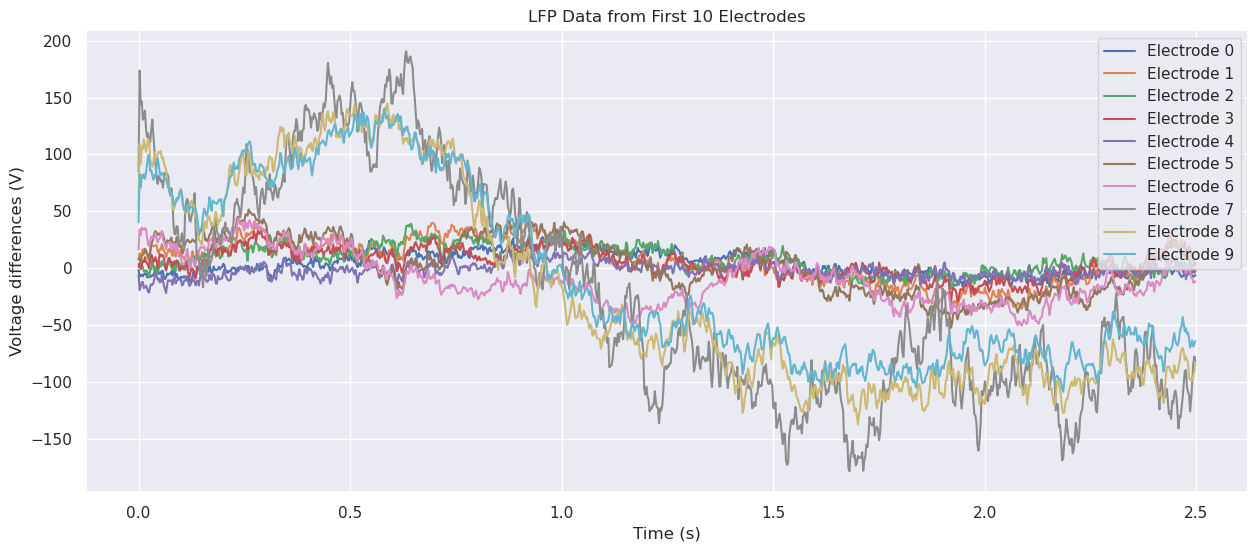

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Access LFP data from the NWB file
lfp_data = nwb.acquisition['LFPs'].data[:1000, :10]  # Limiting to first 1000 samples and 10 electrodes for visualization
time = np.arange(lfp_data.shape[0]) / nwb.acquisition['LFPs'].rate

plt.figure(figsize=(15, 6))
for i in range(lfp_data.shape[1]):
    plt.plot(time, lfp_data[:, i] + i * 5e-4, label=f'Electrode {i}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage differences (V)')
plt.title('LFP Data from First 10 Electrodes')
plt.legend(loc='upper right')
plt.show()

## Summary

Here, a brief summary of the analysis and visualization performed would be appropriate, providing hints at possible future directions for exploring the dataset.